In [3]:
pwd

'/Users/dillmedd/Documents/Flatiron/Group Project/Group-4-Microsoft_Movie_Analysis/notebooks'

In [5]:
ls

CONTRIBUTING.md                    code/
DS_Project_Presentation.pdf        data/
LICENSE.md                         dsc-phase1-project-template.ipynb
Movie Data Frames.ipynb            images/
README.md                          notebooks/
TEMPLATE_README.md


In [4]:
cd ..

/Users/dillmedd/Documents/Flatiron/Group Project/Group-4-Microsoft_Movie_Analysis


In [6]:
cd data

/Users/dillmedd/Documents/Flatiron/Group Project/Group-4-Microsoft_Movie_Analysis/data


In [7]:
cd zippedData

/Users/dillmedd/Documents/Flatiron/Group Project/Group-4-Microsoft_Movie_Analysis/data/zippedData


In [2]:
import pandas as pd
from matplotlib import pyplot as plt


In [8]:
df_budgets = pd.read_csv('tn.movie_budgets.csv.gz')
df_budgets.head(30)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [9]:
df_budgets['production_budget'] = df_budgets['production_budget'].str.replace('$','')
df_budgets['domestic_gross'] = df_budgets['domestic_gross'].str.replace('$','')
df_budgets['worldwide_gross'] = df_budgets['worldwide_gross'].str.replace('$','')
df_budgets['production_budget'] = df_budgets['production_budget'].str.replace(',','')
df_budgets['domestic_gross'] = df_budgets['domestic_gross'].str.replace(',','')
df_budgets['worldwide_gross'] = df_budgets['worldwide_gross'].str.replace(',','')

In [10]:
df_budgets['production_budget'] = df_budgets['production_budget'].astype(int)
df_budgets['domestic_gross'] = df_budgets['domestic_gross'].astype(int)
df_budgets['worldwide_gross'] = df_budgets['worldwide_gross'].astype(int)

df_budgets['total_profit'] = df_budgets['worldwide_gross'] - df_budgets['production_budget']

In [11]:
df_budgets['year'] = pd.DatetimeIndex(df_budgets['release_date']).year
df_budgets = df_budgets.loc[df_budgets['year'] >= 2010]

In [12]:
df_budgets['ROI %'] = (df_budgets['total_profit'] / df_budgets['production_budget']) * 100

In [13]:
df_highbudget = df_budgets.loc[df_budgets['production_budget'] >= 150000000]

In [14]:
df_budgets.sort_values(by=['ROI %'], ascending = False).head(40)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,year,ROI %
5679,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,41556474,2015,41556.474000
5211,12,"Jan 6, 2012",The Devil Inside,1000000,53262945,101759490,100759490,2012,10075.949000
5062,63,"Apr 1, 2011",Insidious,1500000,54009150,99870886,98370886,2011,6558.059067
5213,14,"Apr 17, 2015",Unfriended,1000000,32789645,64364198,63364198,2015,6336.419800
4664,65,"Oct 20, 2010",Paranormal Activity 2,3000000,84752907,177512032,174512032,2010,5817.067733
4249,50,"Jan 20, 2017",Split,5000000,138141585,278964806,273964806,2017,5479.296120
5189,90,"Mar 21, 2014",Godâs Not Dead,1150000,60755732,63777092,62627092,2014,5445.834087
4248,49,"Feb 24, 2017",Get Out,5000000,176040665,255367951,250367951,2017,5007.359020
3517,18,"May 25, 2012",Les Intouchables,10800000,13182281,484873045,474073045,2012,4389.565231
5063,64,"Oct 21, 2016",Moonlight,1500000,27854931,65245512,63745512,2016,4249.700800


In [15]:
highest_rois = df_budgets.loc[df_budgets['ROI %'] > 1000]


In [16]:
highest_rois

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,year,ROI %
621,22,"Jul 3, 2013",Despicable Me 2,76000000,368065385,975216835,899216835,2013,1183.180046
625,26,"Jul 8, 2016",The Secret Life of Pets,75000000,368384330,886750534,811750534,2016,1082.334045
629,30,"Jun 30, 2017",Despicable Me 3,75000000,264624300,1034727750,959727750,2017,1279.637000
672,73,"Jul 10, 2015",Minions,74000000,336045770,1160336173,1086336173,2015,1468.021855
955,56,"Feb 12, 2016",Deadpool,58000000,363070709,801025593,743025593,2016,1281.078609
...,...,...,...,...,...,...,...,...,...
5647,48,"Jul 22, 2011",Another Earth,175000,1321194,2102779,1927779,2011,1101.588000
5672,73,"Jun 15, 2012",Your Sister's Sister,120000,1597486,3090593,2970593,2012,2475.494167
5679,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,41556474,2015,41556.474000
5685,86,"Jul 7, 2017",A Ghost Story,100000,1594798,2769782,2669782,2017,2669.782000


Text(0, 0.5, 'ROI %')

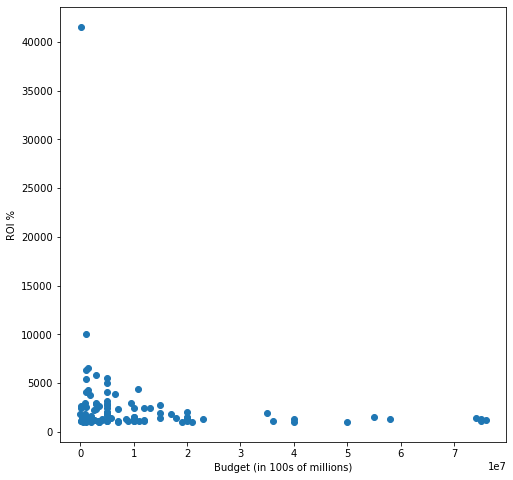

In [17]:
fig, ax = plt.subplots(figsize = (8, 8))

plt.scatter(highest_rois['production_budget'], highest_rois['ROI %'])
plt.xlabel('Budget (in 100s of millions)')
plt.ylabel('ROI %')

In [18]:
genres_top100roi = {'Horror/Thriller': 45, 'Comedy' : 17, 'Drama/Romance' : 16, 'Musical' : 3, 'Animation' : 5, 'Sci-fi' : 5, 'Documentary' : 2, 'Sport' : 2, 'Adventure' : 1}

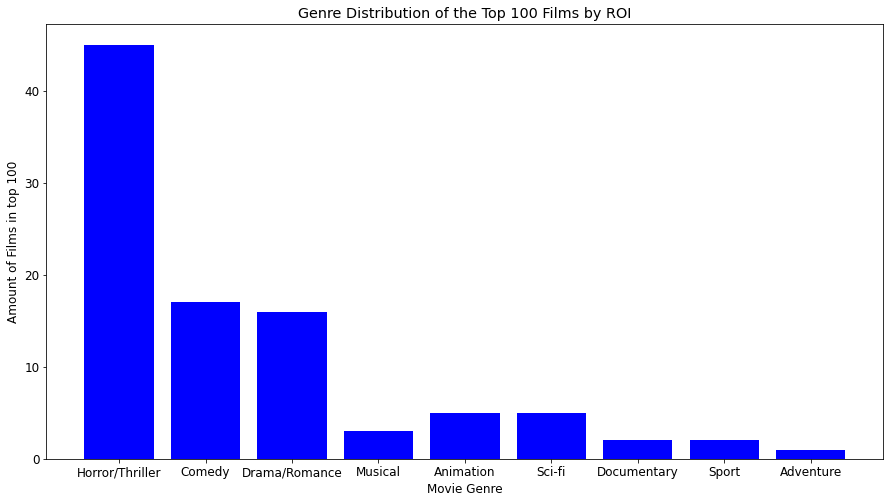

In [39]:
fig, ax = plt.subplots(figsize = (15, 8))

plt.bar(range(len(genres_top100roi)), genres_top100roi.values(), align='center', color = 'b')
plt.xticks(range(len(genres_top100roi)), list(genres_top100roi.keys()))


plt.xlabel('Movie Genre')
plt.ylabel('Amount of Films in top 100')
plt.title('Genre Distribution of the Top 100 Films by ROI')


plt.show()


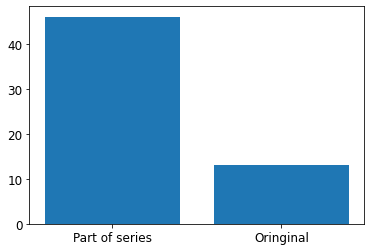

In [28]:
fig, ax = plt.subplots()

x = ['Part of series', 'Oringinal']
y = [46, 13]
ax.bar(x, y);


In [27]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 12

In [35]:
df_highbudget['Box Office Success'] = np.where(df_highbudget['ROI %'] > 250, True, False)
df_highbudget['Box Office Failure'] = np.where(df_highbudget['ROI %'] < 150, True, False)

<ipython-input-35-12655acf0e7b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_highbudget['Box Office Success'] = np.where(df_highbudget['ROI %'] > 250, True, False)
<ipython-input-35-12655acf0e7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_highbudget['Box Office Failure'] = np.where(df_highbudget['ROI %'] < 150, True, False)


In [36]:
df_highbudget['Box Office Success'].value_counts()

False    77
True     59
Name: Box Office Success, dtype: int64

In [38]:
df_highbudget['Box Office Failure'].value_counts()

False    86
True     50
Name: Box Office Failure, dtype: int64

In [37]:
df_highbudget.loc[df_highbudget['Box Office Success'] == True]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,year,ROI %,Box Office Success,Box Office Failure
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015,324.384139,True,False
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017,315.369636,True,False
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,571.016739,True,False
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,582.711400,True,False
10,11,"Jul 20, 2012",The Dark Knight Rises,275000000,448139099,1084439099,809439099,2012,294.341491,True,False
16,17,"May 6, 2016",Captain America: Civil War,250000000,408084349,1140069413,890069413,2016,356.027765,True,False
18,19,"Dec 14, 2012",The Hobbit: An Unexpected Journey,250000000,303003568,1017003568,767003568,2012,306.801427,True,False
20,21,"Dec 13, 2013",The Hobbit: The Desolation of Smaug,250000000,258366855,960366855,710366855,2013,284.146742,True,False
21,22,"Dec 17, 2014",The Hobbit: The Battle of the Five Armies,250000000,255119788,945577621,695577621,2014,278.231048,True,False
22,23,"Apr 14, 2017",The Fate of the Furious,250000000,225764765,1234846267,984846267,2017,393.938507,True,False


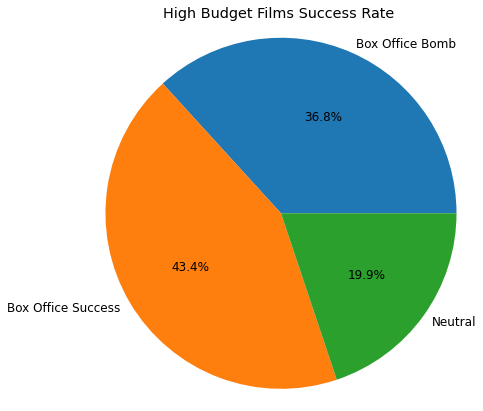

In [30]:
labels = 'Box Office Bomb', 'Box Office Success', 'Neutral'
amts = [50, 59, 27]

fig, ax = plt.subplots(figsize=(7,7))
ax.pie(amts, labels = labels, autopct='%1.1f%%', labeldistance=1.06)
ax.axis('equal')

plt.title('High Budget Films Success Rate');

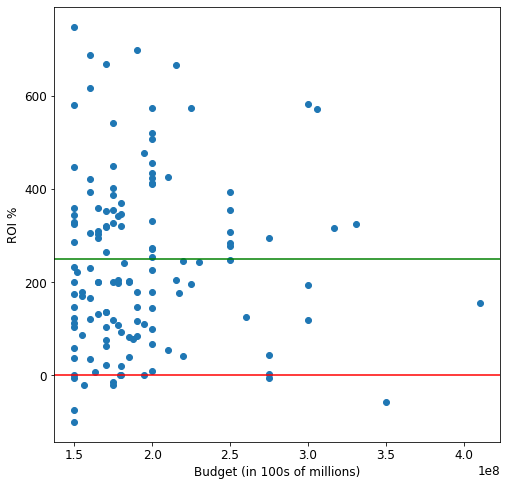

In [40]:
fig, ax = plt.subplots(figsize = (8, 8))

plt.scatter(df_highbudget['production_budget'], df_highbudget['ROI %'] )
plt.xlabel('Budget (in 100s of millions)')
plt.ylabel('ROI %')
plt.axhline(y=0, color='r', linestyle='-')
plt.axhline(y=250, color='g', linestyle='-');